In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
data = pd.read_csv("data/winequality-red.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


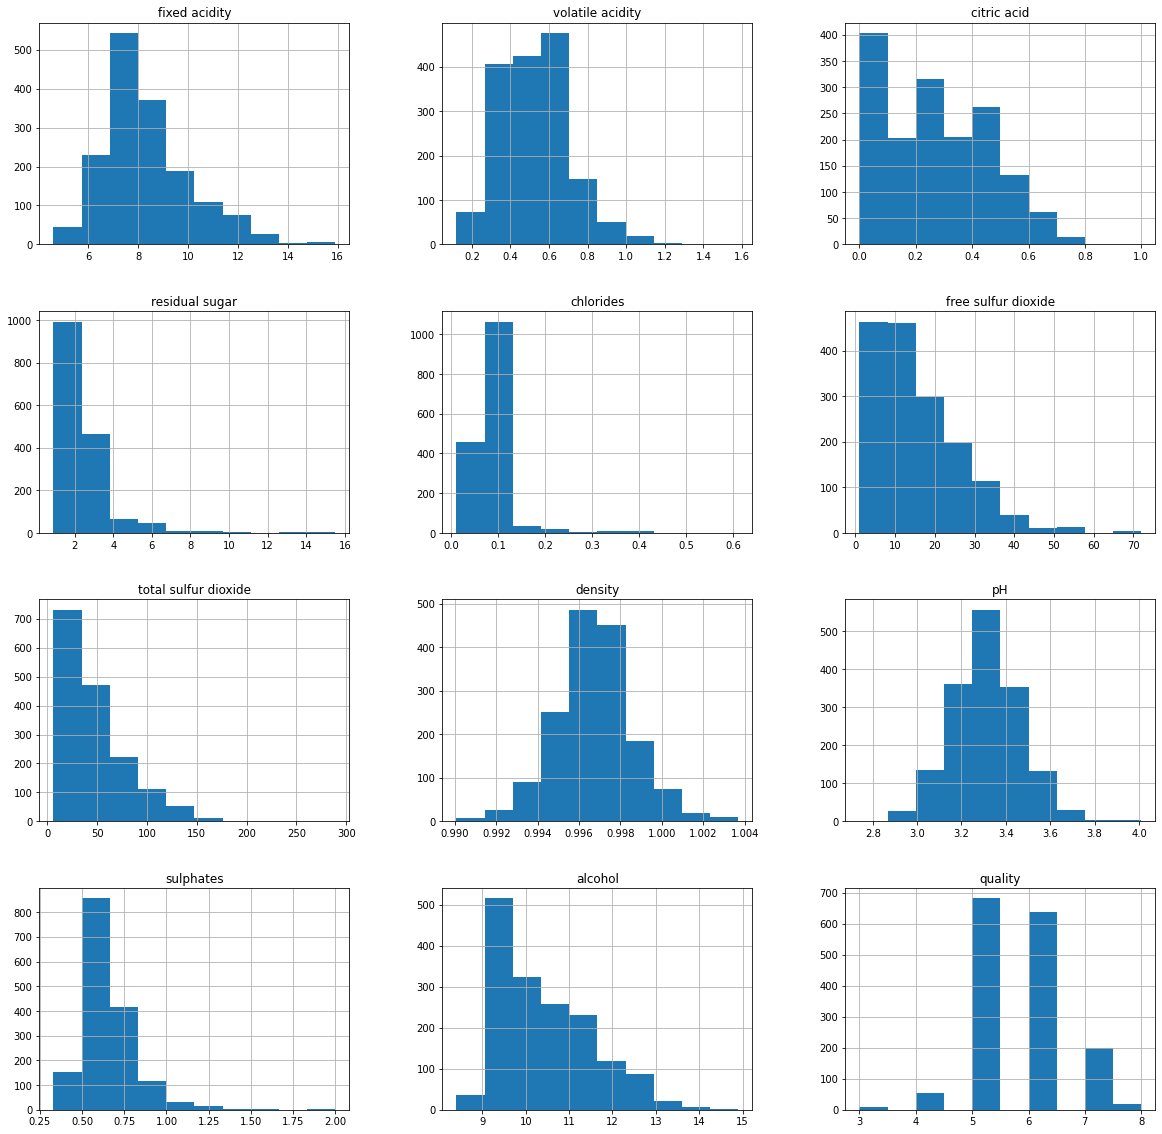

In [23]:
data.hist(figsize = (20, 20))
plt.show()

# Del gráfico, se puede ver que fixed acidity, volatile acidity, density, pH y quality tienen distr normal.
# Todos los demás no.

<AxesSubplot:>

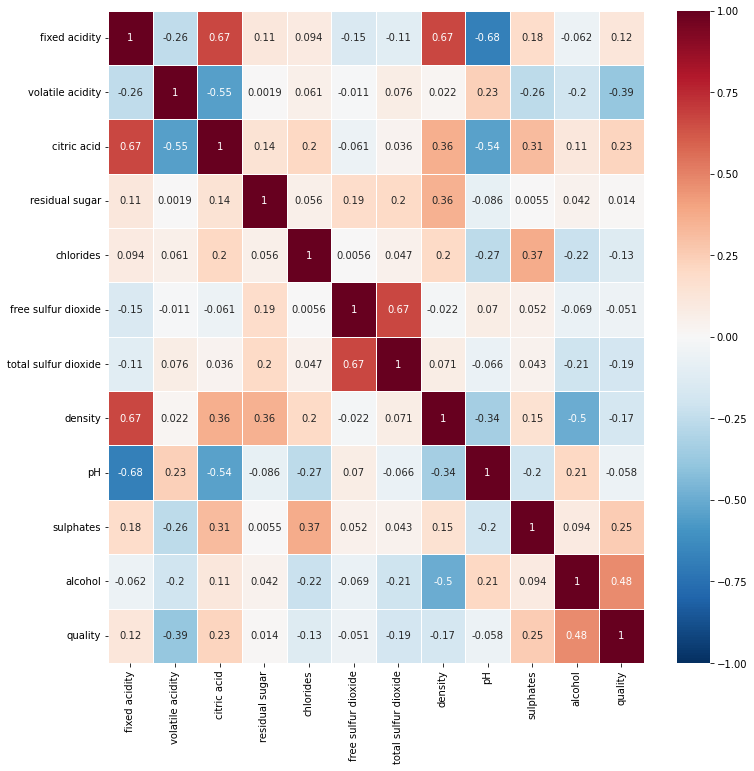

In [29]:
fig, axis = plt.subplots(figsize = (12, 12))
corr = data.corr()
sb.heatmap(corr, annot = True, linewidths = 1, vmin = -1, cmap = 'RdBu_r', ax = axis)

# Aqui se puede ver, que a mayor alcohol, menos densidad, lo que está bien
# A mayor ácido cítrico, menor pH, lo que está bien.
# Por lo tanto, los datos deben estar bien.

C:\Users\labmicro\AppData\Local\Temp\ipykernel_15116\696048491.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data, ax = axis)


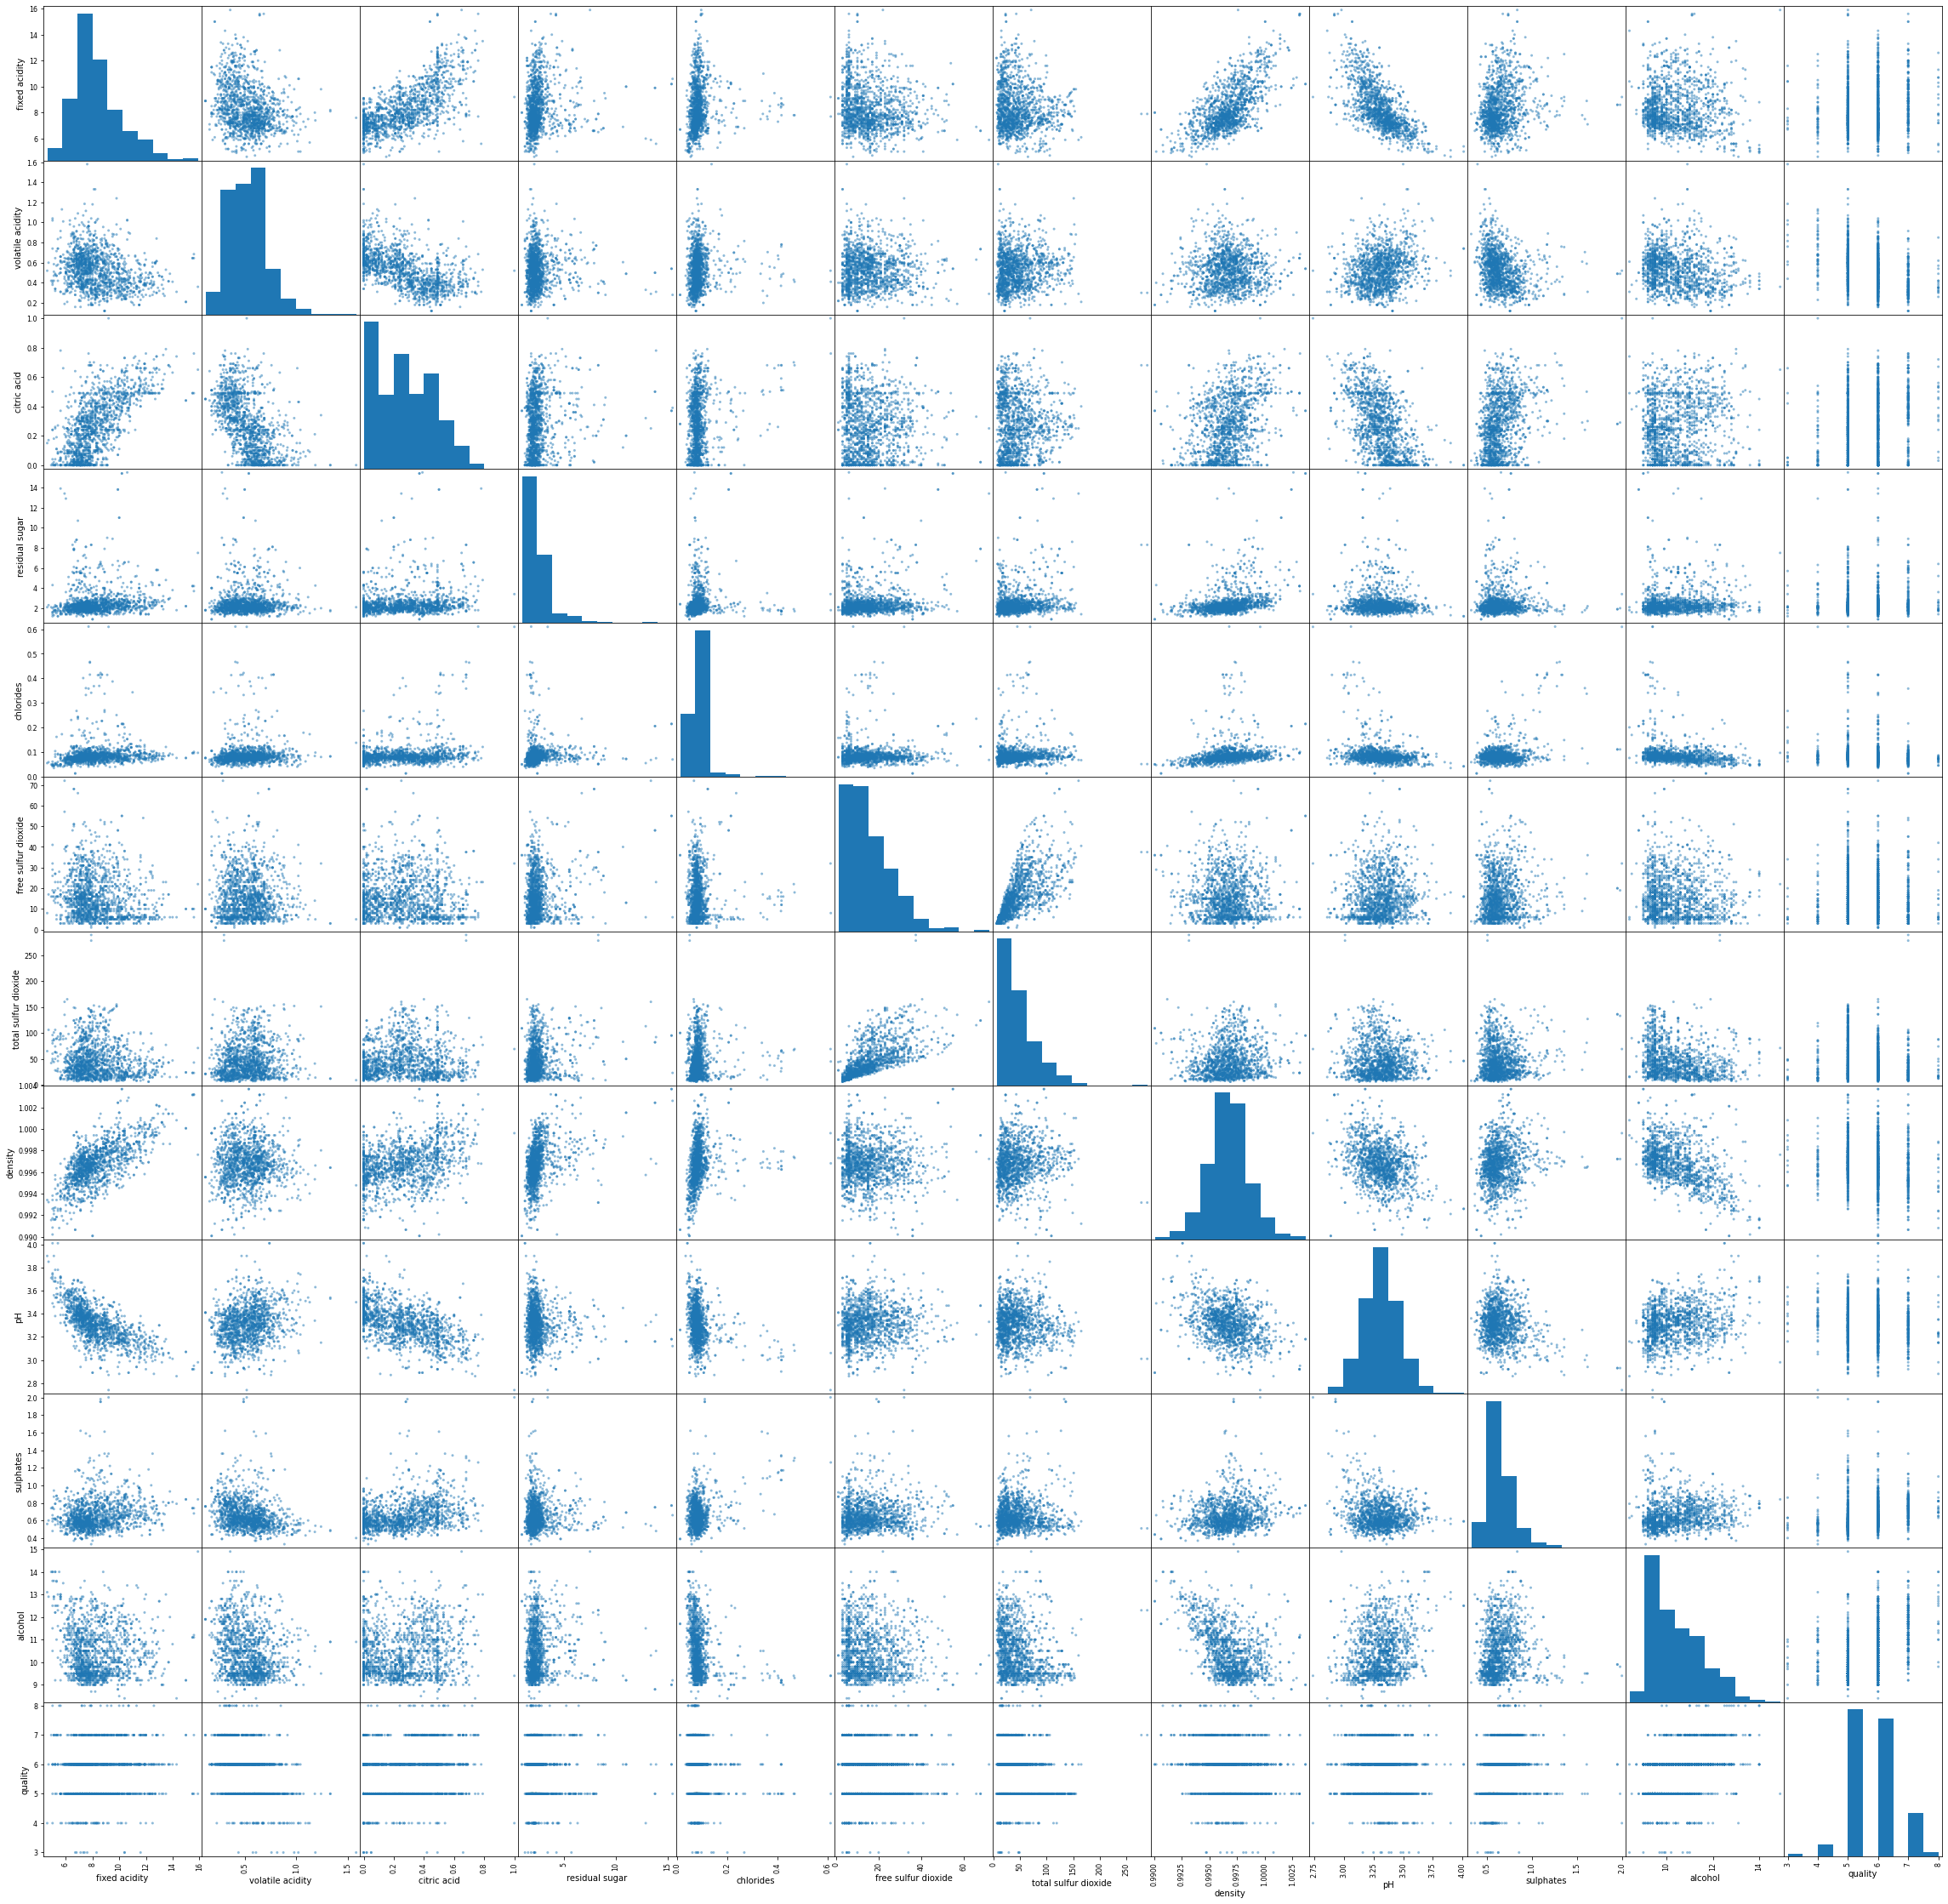

In [32]:
fig, axis = plt.subplots(figsize = (40, 40))
pd.plotting.scatter_matrix(data, ax = axis)
plt.show()

In [48]:
features = data.columns
for feature in data.columns:
    datos = data[feature]
    Q1 = np.percentile(datos, q = 25)
    Q3 = np.percentile(datos, q = 75)
    rango_intercuartil = Q3 - Q1
    paso = rango_intercuartil * 1.5
    outlier_mayor = Q3 + paso
    outlier_menor = Q1 - paso

    mask_outliers = (datos <= outlier_mayor) & (datos >= outlier_menor)
    datos_outliers = datos[~mask_outliers]
    print(f'Los rangos outliers de {feature} son: {outlier_menor} - {outlier_mayor}')
    print(f'Los datos outliers de {feature} son: {datos_outliers.values}')
    good_data = data.drop(data.index[~mask_outliers]).reset_index(drop = True)
    

good_data

Los rangos outliers de fixed acidity son: 3.95 - 12.349999999999998
Los datos outliers de fixed acidity son: [12.8 12.8 15.  15.  12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8
 12.8 14.  13.7 13.7 12.7 12.5 12.8 12.6 15.6 12.5 13.  12.5 13.3 12.4
 12.5 12.9 14.3 12.4 15.5 15.5 15.6 13.  12.7 13.  12.7 12.4 12.7 13.2
 13.2 13.2 15.9 13.3 12.9 12.6 12.6]
Los rangos outliers de volatile acidity son: 0.015000000000000013 - 1.0150000000000001
Los datos outliers de volatile acidity son: [1.13  1.02  1.07  1.33  1.33  1.04  1.09  1.04  1.24  1.185 1.02  1.035
 1.025 1.115 1.02  1.02  1.58  1.18  1.04 ]
Los rangos outliers de citric acid son: -0.4049999999999999 - 0.9149999999999999
Los datos outliers de citric acid son: [1.]
Los rangos outliers de residual sugar son: 0.8499999999999996 - 3.6500000000000004
Los datos outliers de residual sugar son: [ 6.1   6.1   3.8   3.9   4.4  10.7   5.5   5.9   5.9   3.8   5.1   4.65
  4.65  5.5   5.5   5.5   5.5   7.3   7.2   3.8   5.6   4.    4.    4.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1567,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1568,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1569,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [53]:
# Ahora, tenemos los datos buenos. Es hora de hacer el modelo predictivo. Primero, hay que separar los datos
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [72]:
# Separar los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

# Elegir los modelos de regression a ocupar.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold

modelos = {'DTC': DecisionTreeClassifier(), 'GBR': GradientBoostingRegressor(), 'BR': BayesianRidge(), 'SVR': SVR()}

In [84]:
# Para valificar el modelo
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score

# Entrenar los modelos
resultados = {}
for modelo in modelos:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_score = cross_val_score(modelos[modelo], X_train, y_train, cv = kfold, scoring = 'explained_variance')
    resultados[modelo] = cv_score



c:\Users\labmicro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\labmicro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\labmicro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\labmicro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


(10, 4)

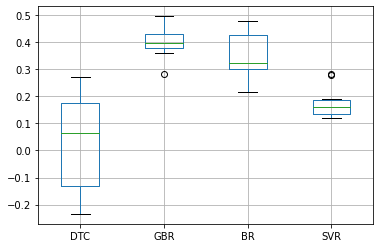

In [85]:
df = pd.DataFrame(resultados)
pd.plotting.boxplot(df)
df.shape

In [92]:
modelo_elegido = GradientBoostingRegressor()
modelo_elegido.fit(X_train, y_train)
prediccion = modelo_elegido.predict(X_val)
resultado = explained_variance_score(y_val, prediccion)
print(f'El modelo GBR, tiene un Explained variance de: {resultado}')

El modelo GBR, tiene un Explained variance de: 0.4767610948854858


In [104]:
con_predichos = X_val.copy()
con_predichos['Predichos'] = prediccion
con_predichos['Reales'] = y_val
con_predichos['Predichos round'] = list(map(round, prediccion))
con_predichos['Iguales'] = (con_predichos['Reales']) == (con_predichos['Predichos round'])

In [107]:
con_predichos.iloc[:, [-3, -2, -1]].to_excel('Resultados.xlsx')

In [106]:
accuracy = con_predichos['Iguales'].sum() / len(con_predichos['Iguales'])
print(accuracy)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Predichos,Reales,Predichos round,Iguales
1532,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,5.759735,6,6,True
1308,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5.427855,5,5,True
483,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5.606523,5,6,False
650,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5.060858,5,5,True
1137,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6.202814,6,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,9.3,0.39,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6.052859,6,6,True
918,8.4,0.36,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6.057450,6,6,True
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,6.380310,6,6,True
856,9.3,0.36,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6.137919,6,6,True
